In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/full.csv')

In [4]:
df.sort_values('yieldpercol')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
241,NJ,10000.0,19,190000.0,101000.0,1.60,304000.0,2003
144,ME,11000.0,20,220000.0,106000.0,0.79,174000.0,2001
101,ME,11000.0,21,231000.0,143000.0,0.75,173000.0,2000
58,ME,14000.0,22,308000.0,89000.0,0.83,256000.0,1999
358,ME,11000.0,23,253000.0,86000.0,1.60,405000.0,2006
...,...,...,...,...,...,...,...,...
187,LA,35000.0,124,4340000.0,347000.0,1.16,5034000.0,2002
28,ND,230000.0,128,29440000.0,8832000.0,0.63,18547000.0,1998
309,HI,9000.0,131,1179000.0,283000.0,1.43,1686000.0,2005
792,HI,12000.0,131,1572000.0,16000.0,1.51,2374000.0,2017


In [3]:
low_states = ['MD', 'NM', 'NV', 'OK', 'SC']
df2 = df[~df.state.isin(low_states)]

In [91]:
df2.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.196917,0.950501,0.803750,-0.224821,0.906235,0.015745
yieldpercol,0.196917,1.000000,0.363208,0.348984,-0.398118,0.228774,-0.308476
totalprod,0.950501,0.363208,1.000000,0.867004,-0.253534,0.898538,-0.060902
stocks,0.803750,0.348984,0.867004,1.000000,-0.287982,0.696741,-0.149462
priceperlb,-0.224821,-0.398118,-0.253534,-0.287982,1.000000,-0.084617,0.709114
prodvalue,0.906235,0.228774,0.898538,0.696741,-0.084617,1.000000,0.171205
year,0.015745,-0.308476,-0.060902,-0.149462,0.709114,0.171205,1.000000


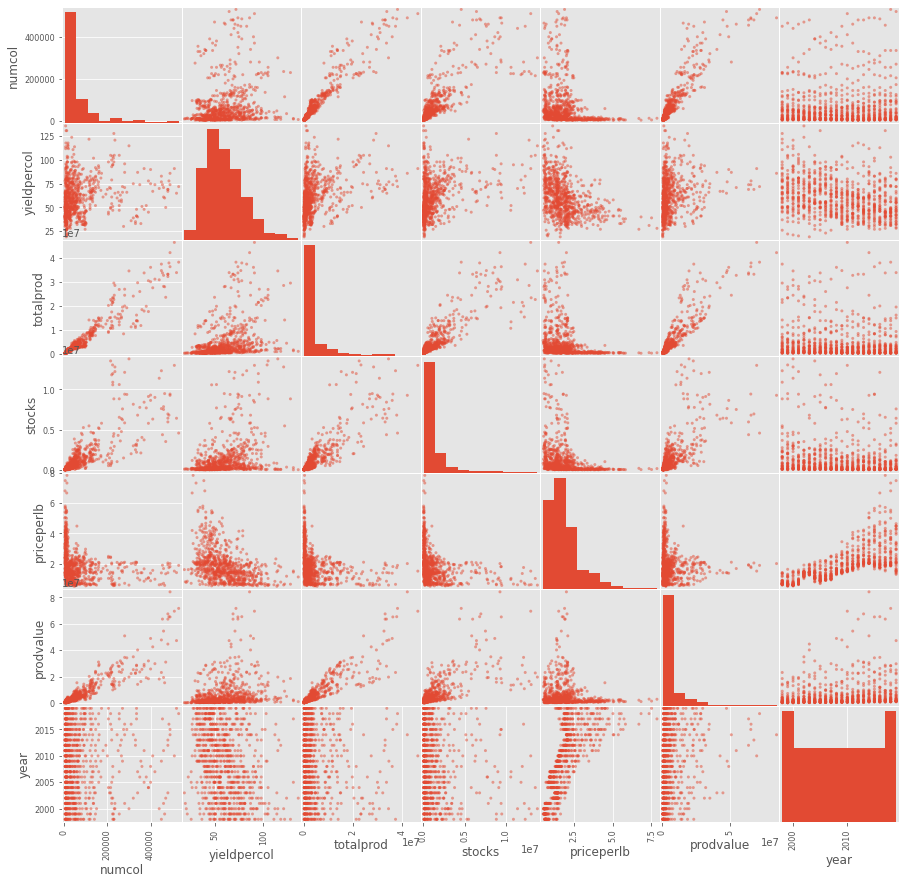

In [96]:
pd.plotting.scatter_matrix(df2, figsize=(15,15));

Some basic plots over time

In [16]:
avgs = df2.groupby('year').mean().reset_index()
avgs

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,66307.692308,72.102564,5.584026e+06,2.045256e+06,0.796154,3.696282e+06
1,1999,66692.307692,67.358974,5.145026e+06,1.988308e+06,0.751026,3.118385e+06
2,2000,65794.871795,69.897436,5.582744e+06,2.154000e+06,0.755385,3.326795e+06
3,2001,64307.692308,66.333333,4.716564e+06,1.644897e+06,0.858974,3.335205e+06
4,2002,64974.358974,67.692308,4.345026e+06,9.943077e+05,1.326410,5.747769e+06
5,2003,65897.435897,63.794872,4.621462e+06,1.035051e+06,1.458205,6.411564e+06
6,2004,64538.461538,65.589744,4.656590e+06,1.552256e+06,1.274359,5.013256e+06
7,2005,60897.435897,65.128205,4.437795e+06,1.580308e+06,1.150256,4.069821e+06
8,2006,60564.102564,62.846154,3.937667e+06,1.540538e+06,1.247179,4.008179e+06
9,2007,61846.153846,59.974359,3.768897e+06,1.338462e+06,1.398974,4.102974e+06


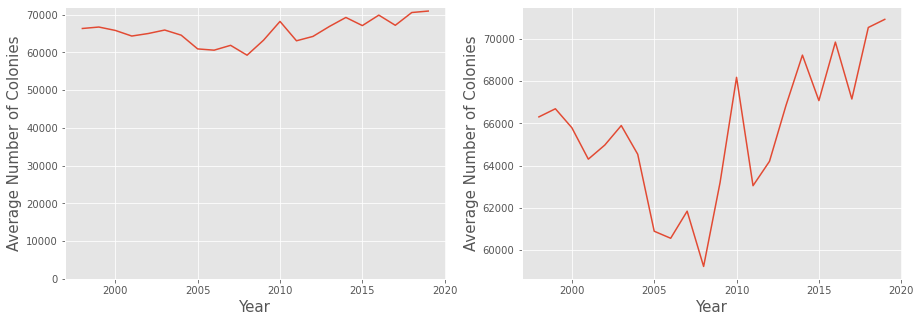

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(avgs['year'], avgs['numcol'])
axes[0].set_ylim([0, 72000])
axes[1].plot(avgs['year'], avgs['numcol'])
axes[0].set_xlabel('Year', fontsize=15)
axes[1].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Average Number of Colonies', fontsize=15)
axes[1].set_ylabel('Average Number of Colonies', fontsize=15);

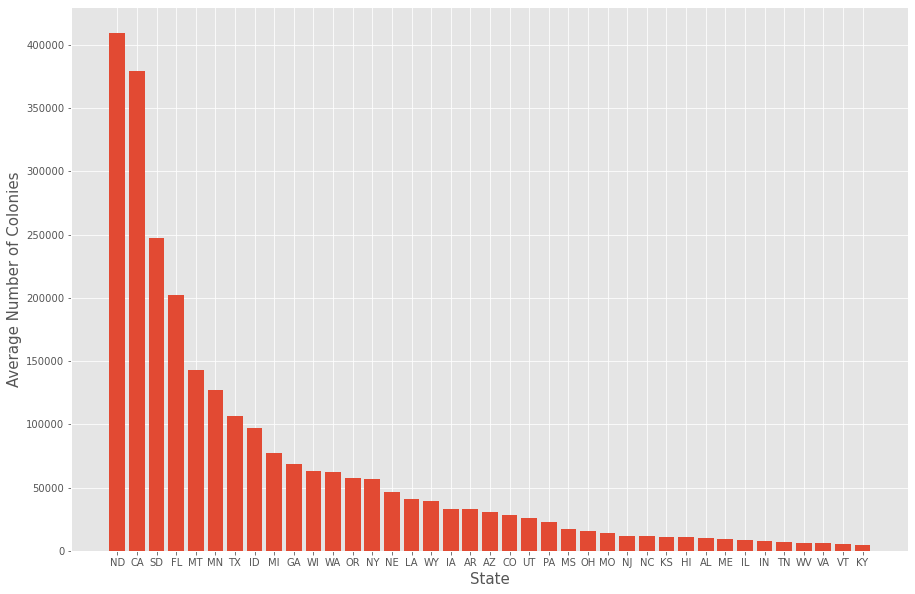

In [4]:
states = df2.groupby('state').mean().reset_index().sort_values('numcol', ascending=False)[['state', 'numcol']]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(states['state'], states['numcol'])
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Average Number of Colonies', fontsize=15);

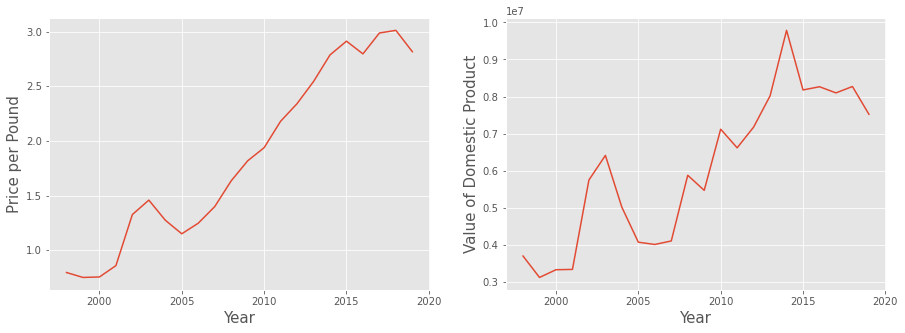

In [77]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(avgs['year'], avgs['priceperlb'])
axes[1].plot(avgs['year'], avgs['prodvalue'])
axes[0].set_xlabel('Year', fontsize=15)
axes[1].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Price per Pound', fontsize=15)
axes[1].set_ylabel('Value of Domestic Product', fontsize=15);

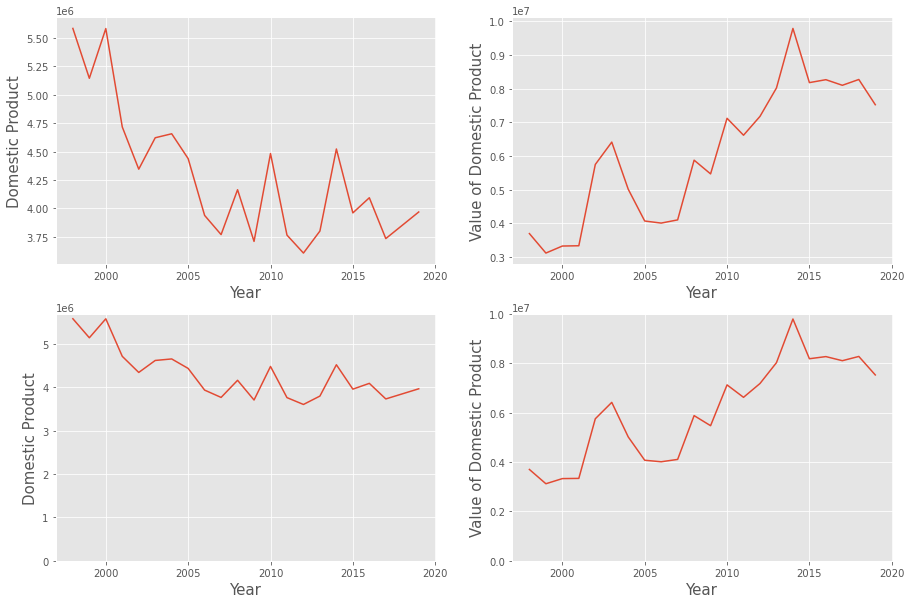

In [78]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot(avgs['year'], avgs['totalprod'])
axes[0][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].plot(avgs['year'], avgs['totalprod'])
axes[1][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].set_ylim([0,5700000])
axes[1][1].set_ylim([0,10000000])
axes[0][0].set_xlabel('Year', fontsize=15)
axes[0][1].set_xlabel('Year', fontsize=15)
axes[0][0].set_ylabel('Domestic Product', fontsize=15)
axes[0][1].set_ylabel('Value of Domestic Product', fontsize=15)
axes[1][0].set_xlabel('Year', fontsize=15)
axes[1][1].set_xlabel('Year', fontsize=15)
axes[1][0].set_ylabel('Domestic Product', fontsize=15)
axes[1][1].set_ylabel('Value of Domestic Product', fontsize=15);

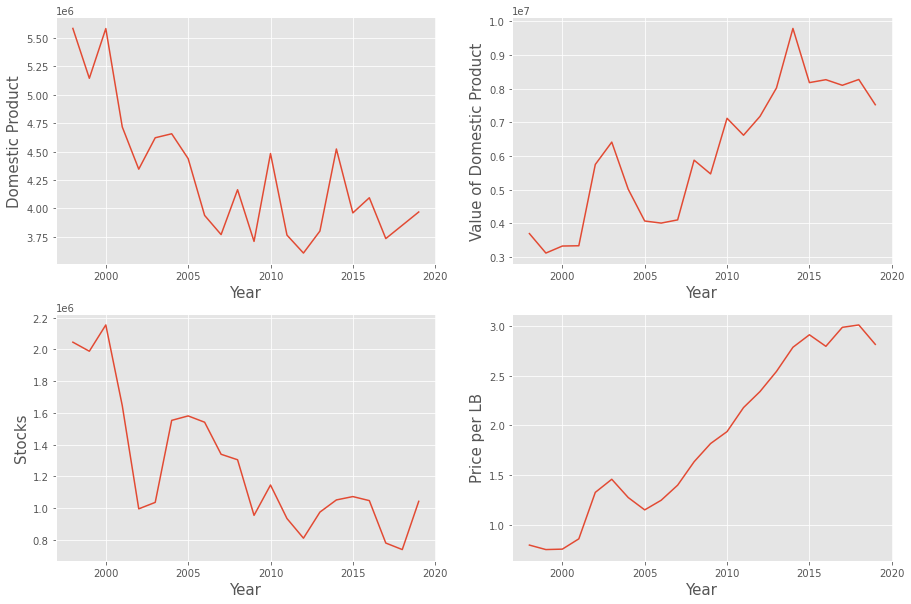

In [80]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot(avgs['year'], avgs['totalprod'])
axes[0][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].plot(avgs['year'], avgs['stocks'])
axes[1][1].plot(avgs['year'], avgs['priceperlb'])
axes[0][0].set_xlabel('Year', fontsize=15)
axes[0][1].set_xlabel('Year', fontsize=15)
axes[0][0].set_ylabel('Domestic Product', fontsize=15)
axes[0][1].set_ylabel('Value of Domestic Product', fontsize=15)
axes[1][0].set_xlabel('Year', fontsize=15)
axes[1][1].set_xlabel('Year', fontsize=15)
axes[1][0].set_ylabel('Stocks', fontsize=15)
axes[1][1].set_ylabel('Price per LB', fontsize=15);

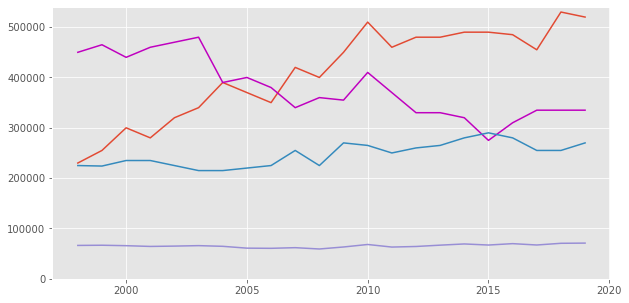

In [33]:
nd = df2[df2['state'] == 'ND']
ca = df2[df2['state'] == 'CA']
sd = df2[df2['state'] == 'SD']
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(nd['year'], nd['numcol'])
ax.plot(ca['year'], ca['numcol'], color='m')
ax.plot(sd['year'], sd['numcol'])
ax.plot(avgs['year'], avgs['numcol'])
ax.set_ylim(0,540000);

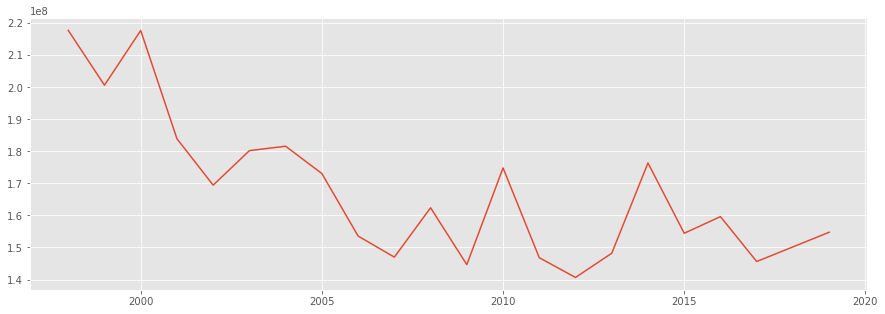

In [4]:
totals = df2.groupby('year').sum().reset_index()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(totals['year'], totals['totalprod'])